In [1]:
import numpy as np
import matplotlib
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from time import time
from scipy.stats import norm

# Задание 7

#### 1. Методом случайного поиска найти минимальное значение функции $f$ на множестве $A = \left\{(x_1, x_2)\colon \ x_1^2 + x_2^2 \leq 1\right\}$, где 
#### $$f(x_1, x_2) = x_1^3\sin\left(\dfrac{1}{x_1}\right) + 10x_1x_2^4 \cos\left(\dfrac{1}{x_2}\right),$$
#### $f(0, 0) = 0$ по непрерывности.

<IPython.core.display.Javascript object>


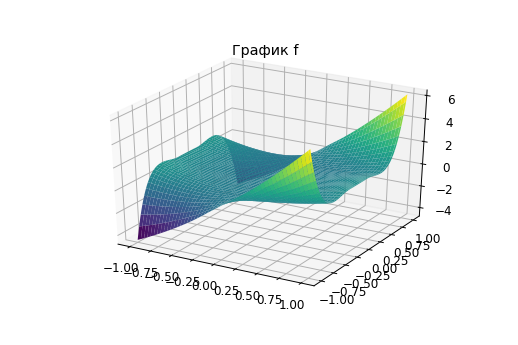

In [2]:
%matplotlib notebook
x, y = np.mgrid[-1:1:0.00101, -1:1:0.00101]
z = x**3 * np.sin(1 / x) + 10 * x * y**4 * np.cos(1 / y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
plt.title('График f')
plt.show()

In [4]:
def opt_fun(x, y):
    return x**3 * np.sin(1 / x) + 10 * x * y**4 * np.cos(1 / y)

Будем генерировать $n$ равномерно распределенных по окружности $A$ независимых случайных величин $X_1, \ldots X_n$ и выбирать в качестве решения ту, на которой минимизируется значение $f$.

Найдем распределение полярных координат при равномерном распределении по окружности:
$$\mathbb{P}(X \in B) = \dfrac{1}{\pi}\iint\limits_Bdxdy = \dfrac{1}{\pi}\iint\limits_Brdrd\varphi = \iint\limits_Bdr^2d\left(\dfrac{\varphi}{2\pi}\right),$$
откуда можно сделать вывод, что $\varphi \sim \mathcal{U}(0, 2\pi)$, а $r$ имеет функцию распределения
$$F_r(x) = 
\begin{cases}
0, &x < 0, \\
x^2, &x \in [0, 1], \\
1, &x > 1.
\end{cases}$$

Для моделирования $r$ будем использовать метод обращения функции распределения:
$$r \overset{d}{=} \sqrt{U}, \quad U \sim \mathcal{U}[0, 1].$$

In [5]:
n = 10**7
loop_sz = 1
fmin = 1
amin = [0, 0]

for i in range(0, loop_sz):
    phi = np.random.rand(n) * 2 * np.pi
    r = np.sqrt(np.random.rand(n))
    f = opt_fun(r * np.cos(phi), r * np.sin(phi))
    cur_min = np.min(f)
    if cur_min < fmin:
        fmin = cur_min
        amin = [r[np.argmin(f)] * np.cos(phi[np.argmin(f)]), r[np.argmin(f)] * np.sin(phi[np.argmin(f)])]
print('min f = ', fmin, '\nargmin f = ', amin)

min f =  -1.2878698642968105 
argmin f =  [-0.35644400090558676, 0.9342434677376833]


Оценим точность реализованного метода. Пусть $x^* = \underset{x \in A}{\operatorname{argmax}}  f(x)$. Потребуем, чтобы для найденного решения $x$ выполнялось $|f(x^*) - f(x)| < \varepsilon$ с вероятностью $\alpha$. Так как фунцкция $f$ является непрерывно дифференцируемой в $A$, верна оценка
$$|f(x^*) - f(x)| \leq \|\nabla f(x^*)\| \|x - x^*\| \leq \sup_A \|\nabla f(x)\|\|x - x^*\| \leq \varepsilon$$
при $\|x - x^*\| \leq \delta = \dfrac{\varepsilon}{\sup\limits_A \|\nabla f(x)\|}$.

Оценим величину $\sup\limits_A \|\nabla f(x)\|$.
$$\dfrac{\partial f}{\partial x_1} = 3x_1^2\sin\left(\dfrac{1}{x_1}\right) - x_1\cos\left(\dfrac{1}{x_1}\right) + 10x_2^4\cos\left(\dfrac{1}{x_2}\right),$$
$$\dfrac{\partial f}{\partial x_2} = 40x_1x_2^3 \cos\left(\dfrac{1}{x_2}\right) + 10x_1x_2^2\sin\left(\dfrac{1}{x_2}\right),$$
$$\|\nabla f(x)\| = \sqrt{\left(\dfrac{\partial f}{\partial x_1}\right)^2 + \left(\dfrac{\partial f}{\partial x_2}\right)^2} \leq \sqrt{14^2 + 50^2} \leq 52.$$
Выберем число испытаний так, чтобы хотя бы один элемент выборки оказался в $\delta$-окрестности $x^*$ с вероятностью не менее $\alpha$. Учтем также, что $x^*$ может лежать на границе круга, и при малых $\delta$ окрестность $B_\delta(x^*) \bigcap A$ можно аппроксимировать полуокружностью.

$$\mathbb{P}(X_k \notin B_\delta(x^*), \ \ k = 1, \ldots, n) \leq \left(1 - \dfrac{\delta^2}{2}\right)^n \leq 1 - \alpha,$$
откуда $n = \dfrac{\ln(1 - \alpha)}{\ln\left(1 - \dfrac{\delta^2}{2}\right)}$

Положим $\varepsilon = 0.01, \alpha = 0.99$. Тогда $\delta = \dfrac{0.01}{52}, \ n = 2.5 \cdot 10^8$.
При таких параметрах результат работы метода $f_* = -1.288$.

In [6]:
delta = 0.01/52
alpha = 0.99
n = np.log(1 - alpha) / np.log(1 - delta**2 / 2)
print(n)

249047600.84305027


#### 2. Методом имитации отжига найти минимальное значение функции Розенброка $g$ в пространстве $\mathbb{R}^2$, где
$$g(x) = (x_1 - 1)^2 + 100(x_2 - x_1^2)^2.$$

In [7]:
def rosenbrock(x, y):
    return (x - 1)**2 + 100 * (y - x**2)**2

Функция Розенброка имеет глобальный минимум в точке $(1, 1)$.

<IPython.core.display.Javascript object>


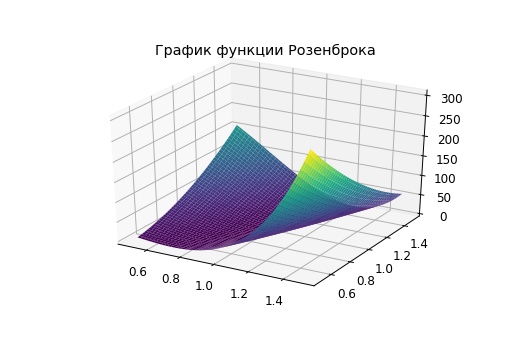

In [8]:
x, y = np.mgrid[0.5:1.5:0.00101, 0.5:1.5:0.00101]
z = rosenbrock(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
plt.title('График функции Розенброка')
plt.show()

In [8]:
%matplotlib inline

Описание алгоритма.

0. Задаются входные параметры $m, \sigma, t_0$ и начальное значение $(x_0, y_0)$.
1. Генерируется кандидат на следующий шаг $(x_{k+1}, y_{k+1}) \sim (\mathcal{N}(x_k, t_k\sigma^2), \mathcal{N}(y_k, t_k\sigma^2))$ и вычиляется приращение функции $\Delta g = g(x_{k+1}, y_{k+1}) - g(x_k, y_k)$.
2. В случае, если $\Delta g < 0$, делается шаг в $(x_{k+1}, y_{k+1})$.
В противном случае переход выполняется с вероятностью $p_k = \dfrac{1}{1 + \exp\left\{\dfrac{\Delta g}{t_k}\right\}}$.
3. Понижается температура по закону
$$t_{k+1} = t_k m^{\dfrac{1}{1+0.1|\Delta g|}}.$$
Такое правило позволяет медленнее понижать температуру в случае, когда начальное приближение далеко от решения, и приращения функции велики.

In [9]:
def annealing(func, sigma, k, t0, x0, y0):
    start = time()
    t = t0
    cur_f = func(x0, y0)
    x = x0
    y = y0
    iterations = 0
    steps = 0
    while t > 10**(-5):
        iterations += 1
        x_new = np.random.randn() * sigma * np.sqrt(t) + x
        y_new = np.random.randn() * sigma * np.sqrt(t) + y
        f_new = func(x_new, y_new)
        df = f_new - cur_f
        if df < 0:
            x = x_new
            y = y_new
            cur_f = f_new 
            steps += 1
        else:
            p = 1 / (1 + np.exp(df / t))
            if np.random.rand() < p:
                x = x_new
                y = y_new
                cur_f = f_new 
                steps += 1
        t *= k ** (1 / (1 + 0.1* abs(df)))
    return [cur_f, x, y, steps / iterations, time() - start, iterations]

In [10]:
sigma = 2.7
k = 0.995
t0 = 2
x0 = 10
y0 = 5
print(annealing(rosenbrock, sigma, k, t0, x0, y0))

[8.984087139752995e-06, 1.0026596890211668, 1.0051882441210094, 0.007807476807201249, 0.08932018280029297, 10887]


In [11]:
from tqdm import tqdm
from time import time 

test_sz = 1000
x_res = np.zeros(test_sz)
y_res = np.zeros(test_sz)
times = np.zeros(test_sz)
its = np.zeros(test_sz)
freq = np.zeros(test_sz)
for i in tqdm(range(0, test_sz)):
    res = annealing(rosenbrock, sigma, k, t0, 10 * (np.random.rand() - 0.5), 10 * (np.random.rand() - 0.5))
    x_res[i] = res[1]
    y_res[i] = res[2]
    times[i] = res[4]
    freq[i] = res[3]
    its[i] = res[5]

100%|██████████| 1000/1000 [01:33<00:00, 10.71it/s]


In [20]:
x_res


array([0.99698354, 1.0002975 , 0.99786078, 1.00010423, 0.99970007,
       1.00375023, 1.00138106, 0.99945999, 1.00120094, 1.00409637,
       0.99703519, 0.99895562, 1.00395326, 0.99593493, 0.999478  ,
       1.0001748 , 0.99803651, 1.00382377, 1.00415023, 1.00563785,
       1.00449234, 1.00144499, 0.99487307, 1.0004953 , 0.99980107,
       0.99896609, 0.99907697, 1.00316896, 1.00072382, 0.99958557,
       1.00159046, 1.00257142, 1.00133257, 0.99280824, 1.00000066,
       1.00164424, 0.99705066, 0.99342243, 1.004518  , 1.00136524,
       0.99908901, 1.00373764, 0.99820073, 0.99978469, 0.99911222,
       1.00582359, 1.00422028, 0.99789722, 1.00196031, 0.99663692,
       0.99754463, 1.00794374, 0.99824747, 1.00316983, 1.00285571,
       0.99615614, 1.00491816, 0.99827619, 0.99925758, 0.99977757,
       0.99746018, 1.00020418, 1.00141211, 0.99997156, 1.00222645,
       1.00351263, 0.9995829 , 1.00459767, 1.00237208, 0.99902652,
       0.99606612, 0.99710935, 1.00070085, 1.0127625 , 1.01058

Так как аналитическая оценка точность алгоритма затруднительна, оценим точность исходя из распределения ошибки $\|x - x^*\|$.

In [26]:
%matplotlib inline

Average time: 0.09400105476379395
Average step frequency: 0.008541376707286847
Average number of iterations: 10192.0


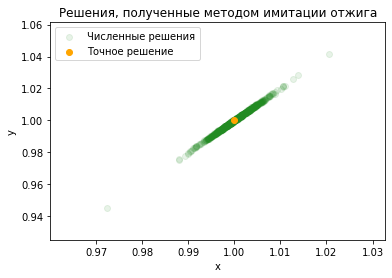

In [74]:
print('Average time:', np.median(times)) # t = 2, sigma = 3, a = 0.995
print('Average step frequency:', freq.mean())
print('Average number of iterations:', np.median(its))
plt.scatter(x_res, y_res, color = 'forestgreen', alpha = 0.1, label='Численные решения')
plt.scatter([1], [1], color='orange', label = 'Точное решение')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Решения, полученные методом имитации отжига')
plt.show()

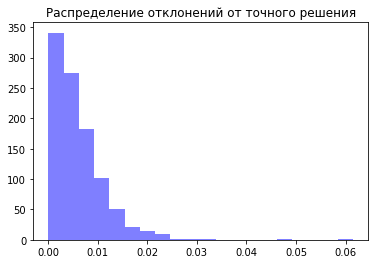

Дисперсия отклонения:  0.005321557109277397


In [75]:
dist = np.sqrt((x_res - 1)**2 + (y_res - 1)**2)
plt.hist(dist, bins=20, color='b', alpha=0.5)
plt.title('Распределение отклонений от точного решения')
plt.show()
print('Дисперсия отклонения: ', np.sqrt(dist.var()))

На гистограмме показаны ошибки $\|x - x^*\|$. По выборке размера $n = 1000$ вычислим квантиль порядка $0.99$.

In [76]:
print(np.quantile(dist, 0.99))

0.023677455487679022


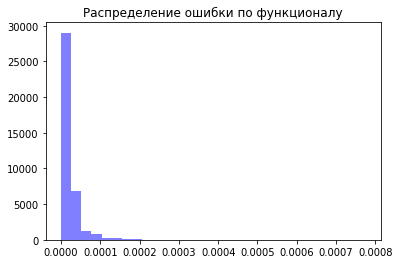

In [77]:
f_res = rosenbrock(x_res, y_res)
plt.hist(f_res, bins=30, density=True, color='b', alpha=0.5)
plt.title('Распределение ошибки по функционалу')
plt.show()

На гистограмме показано распределение ошибки $\|f(x) - f(x^*)\|$. Квантиль порядка $0.99$ равен

In [78]:
print(np.quantile(f_res, 0.99))

0.00013693818949247292


#### 3. Оценить точность. Сравнить результаты со стандартными методами оптимизации.

Проверим результат метода имитации отжига методом сопряженных градиентов.

In [79]:
from scipy.optimize import minimize, rosen
import scipy

x0 = [5, 5]
res = minimize(rosen, x0, method='CG', tol=1e-6)
print(res)

     fun: 2.0087517606575458e-12
     jac: array([4.55523459e-07, 2.83432080e-06])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 367
     nit: 23
    njev: 89
  status: 2
 success: False
       x: array([0.99999858, 0.99999718])


Задачу минимизации из пункта 1 будем решать методом COBYLA (Constrained Optimization BY Linear Approximation).

In [80]:
def opt_fun_1(x):
    return x[0]**3 * np.sin(1 / x[0]) + 10 * x[0] * x[1]**4 * np.cos(1 / x[1])

In [81]:
x0 = [-0.2, -0.8]
cnst = scipy.optimize.NonlinearConstraint(lambda x: (x**2).sum(), 0, 1)
res = minimize(opt_fun_1, x0, method='COBYLA', tol=1e-6, constraints=cnst)
res

     fun: -1.288489227610783
   maxcv: 2.90745205688836e-12
 message: 'Optimization terminated successfully.'
    nfev: 59
  status: 1
 success: True
       x: array([-0.35735285, -0.93396945])

При начальном приближении, далеком от $x^*$, функция возвращает неверный результат.

In [82]:
x0 = [0.2, 0.1]
cnst = scipy.optimize.NonlinearConstraint(lambda x: (x**2).sum(), 0, 1)
res = minimize(opt_fun_1, x0, method='COBYLA', tol=1e-6, constraints=cnst)
res

     fun: -0.012217243593008359
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 49
  status: 1
 success: True
       x: array([ 0.24551919, -0.11102656])

# Задание 8

#### 1. Применить метод Монте-Карло к решению первой краевой задачи для двумерного уравнения Лапласа в единичном круге:
$$
\begin{cases}
\Delta u = 0, \quad (x, y) \in D = \{(x, y)\colon \ \ x^2 + y^2 \leq 1\}\\
u|_{\partial D} = f(x, y) \\
u \in C^2(D), \ f \in C(\partial D)
\end{cases}
$$

#### Для функции $f(x, y) = x^2 - y^2$ найти аналитическое решение и сравнить с полученным по методу Монте-Карло.

Введем на плоскости сетку $x_{ij} = (-1 + ih, -1 + jh)$ с шагом $h$ и назовем внутренними узлы, для которых все 4 соседних узла лежат в круге. Узлы, лежащие в круге, но не удовлетворяющие этому условию, будем называть крайними. 

Аппроксимируя вторые частные производные, можно свести задачу Дирихле к следующей разностной схеме:
$$u_{ij} = \dfrac14(u_{i-1,j} + u_{i+1, j} + u_{i, j-1} + u_{i,j+1}) \text{ для внутренних узлов},$$
$$u_{ij} = f_{ij} \text{ для крайних узлов}.$$

Рассмотрим теперь следующую модель случайного блуждания: 
1. Частица начинает свой путь во внутреннем узле $x_{ij}$.
2. С равными вероятностями она переходит в один из четырех соседних узлов.
3. Процесс продолжается до тех пор, пока частица не попадет на крайний узел $x_{pq}$.

Обозначим $p(x_{ij}, x_{pq})$ вероятность, начав путь в узле $x_{ij}$, закончить его в узле $x_{pq}$. Из формулы полной вероятности следует
\begin{equation}
p(x_{ij}, x_{pq}) = \dfrac14(p(x_{i-1,j}, x_{pq}) + p(x_{i+1, j}, x_{pq}) + p(x_{i, j-1}, x_{pq}) + p(x_{i,j+1}, x_{pq}))
\end{equation}
для внутренних узлов $x_{ij}$ и $p(x_{ij}, x_{ij}) = 1$ для крайних узлов.

Рассмотрим теперь случайную величину $\xi_{ij} = f(x_{pq})$ - значение $f$ в конечной точке пути.
Так как $\mathbb{E}\xi_{ij} = \sum_{p, q}p(x_{ij}, x_{pq})f(x_{pq})$, используя формулу связи вероятностей на соседних узлах, получим
$$\mathbb{E}\xi_{ij} = \dfrac14(\mathbb{E}\xi_{i-1,j} + \mathbb{E}\xi_{i+1, j} + \mathbb{E}\xi_{i, j-1} + \mathbb{E}\xi_{i,j+1}) \text{ для внутренних узлов,}$$
$$\mathbb{E}\xi_{ij} = f_{ij} \text{ для крайних}.$$

Видно, что эти уравнения совпадают с разностной схемой, аппроксимирующей исходную задачу.

Значения $\mathbb{E}\xi_{ij}$ в каждом узле можно вычислить методом Монте-Карло, моделируя описанный выше случайных процесс.

In [86]:
def dirichlet_monte_carlo(x, y, f, n, h):
    res = 0
    for i in range(0, n):
        cur_x = x
        cur_y = y
        while cur_x**2 + cur_y**2 + h**2 + 2 * h * max(abs(cur_x), abs(cur_y)) <= 1:
            if np.random.randint(2):
                cur_x += 2 * h * (np.random.randint(2) - 0.5)
            else:
                cur_y += 2 * h * (np.random.randint(2) - 0.5)
        res += f(cur_x, cur_y)
    return res / n

Для оптимизации вычислений воспользуемся тем, что моделируемый случайный процесс обладает марковским свойством: его "будущее" не зависит от "прошлого", поэтому при прохождении траектории через промежуточные узлы дальнейший путь частицы можно рассматривать как процесс, начавшийся в этом промежуточном узле.

In [87]:
def dirichlet_monte_carlo_matrix(X, Y, f, n, h):
    idx = X**2 + Y**2 <= 1
    res = np.zeros(X.shape)
    N = np.ones(X.shape) * np.inf
    N[idx] = 0
    passed = np.zeros(X.shape)
    while np.min(N) < n:
        passed[passed > 0] = 0
        (i, j) = np.unravel_index(N.argmin(), N.shape)
        passed[i][j] += 1
        while 1 - 2 * (i + j) * h + (i**2 + j**2) * h**2 < 0 and i > 0 and j > 0 and i < 39 and j < 39:
            if np.random.randint(2):
                i += int(2 * (np.random.randint(2) - 0.5))
            else:
                j += int(2 * (np.random.randint(2) - 0.5))
            passed[i][j] += 1
        res[passed > 0] += f(X[i][j], Y[i][j]) * passed[passed > 0]
        N[passed > 0] += passed[passed > 0]
    Z = np.ones(X.shape) * np.inf    
    Z[idx] = res[idx] / N[idx]
    return Z

In [96]:
h = 0.05
n = 10**2 # красивое решение и терпимое время при n = 10**3
X, Y = np.mgrid[-1:1:h, -1:1:h]
f = lambda x, y : x**2 - y**2
Z = dirichlet_monte_carlo_matrix(X, Y, f, n, h)

<IPython.core.display.Javascript object>


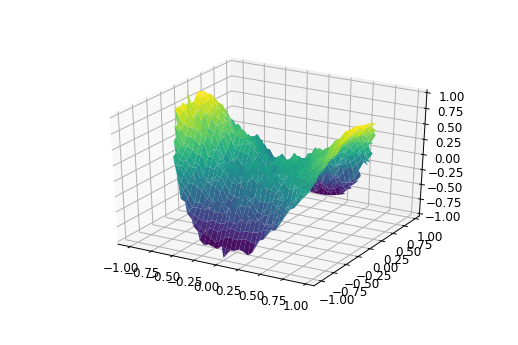

In [97]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X[Z == np.inf] = np.inf
Z[Z == np.inf] = 0
ax.plot_surface(X, Y, Z, cmap='viridis')

График аналитического решения

<IPython.core.display.Javascript object>


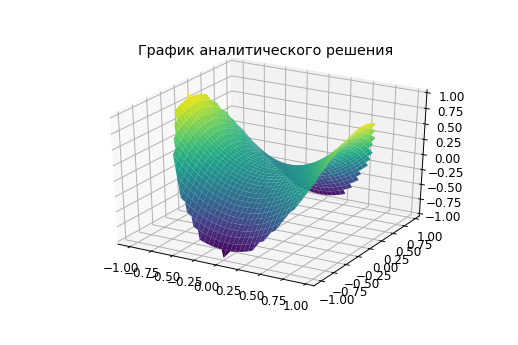

In [98]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
h = 0.05
X, Y = np.mgrid[-1:1:h, -1:1:h]
Z = X**2 - Y**2
X[X**2 + Y**2 > 1] = np.inf
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title('График аналитического решения')
plt.show()

# Задание 9

#### Рассмотреть два вида процессов:
- Винеровский процесс $W(t), t \in [0, 1], \ W(0) = 0.$

- Процесс Орнштейна-Уленбека $X(t),\ t \in [0, 1], \ X(0) = X_0$, то есть стационарный марковский гауссовский процесс. Начальное значение $X_0$ генерируется случайным образом так, чтобы полученный процесс бы стационарным.

#### Для данных процессов
1. Найти ковариационную функцию и переходные вероятности.
2. Промоделировать независимые траектории процесса с данными переходными вероятностями методом добавления разбиения отрезка.
3. Построить график траекторий.

Опишем кратко метод добавления разбиения отрезка. Пусть требуется смоделировать случайный процесс $X(t)$ на отрезке $[0, 1]$. 
1. Моделирование $X_0 = X(0)$.
2. Моделирование $X(1)$ по условному распределению $[X(1)|X(0)]$.
3. Между каждыми соседними узлами $t_1, t_2$ сетки добавим узел $t = \dfrac{t_1 + t_2}{2}$ и смоделируем процесс в нем, используя условное распределение случайной величины $[X(t)|X(t_1) = x_1, X(t_2) = x_2]$.
4. Повторение пункта 3 до тех пор, пока шаг сетки не станет достаточно мелким.

#### Винеровский процесс

Винеровский процесс - гауссовский процесс с независимыми приращениями такой, что
- $W(0) \overset{\text{п.н.}}{=} 0$
- $W(t + h) - W(t) \sim \mathcal{N}(0, \sigma^2h)$

Найдем его ковариационную функцию функцию:
$$ R(t_1, t_2) = \mathbb{E}W(t_1)W(t_2) = \{t_1 < t_2\} = \mathbb{E}W^2(t_1) + \mathbb{E}[W(t_1) - W(0)][W(t_2) - W(t_1)] = \sigma^2 t_1 + \mathbb{E}W(t_1)\mathbb{E}[W(t_2) - W(t_1)] = \sigma^2 t_1,$$
откуда
$$K(t_1, t_2) = \min(t_1, t_2) \sigma^2.$$

По определению $W(0) = 0, \ [W(1)|W(0)] \sim \mathcal{N}(0, \sigma^2)$. 

Найдем теперь для $t_1 < t_2 < t_3$ распределение $Y = [W(t_2)|W(t_1) = x_1, W(t_3) = x_3]$. 
Так как $W(t)$ имеет нормальное распределение с параметрами $0$ и $\sigma^2t$, $Y$ имеет плотность
$$p_Y(x_2) = \dfrac{p_{123}(x_1, x_2, x_3)}{p_{13}(x_1, x_3)},$$
где $p_{123}$ -совместная плотность $(W(t_1), W(t_2), W(t_3))$, $p_{13}$ - плотность $(W(t_1), W(t_3))$.

Известно, что плотность $n$-мерного нормального распределения с матожиданием $\mu$ и ковариационной матрицей $\Sigma$ имеет вид
\begin{equation}
p(x) = \dfrac{1}{\sqrt{(2\pi)^n|\Sigma|}}\exp\left\{-\frac{1}{2} (x - \mu)^T\Sigma^{-1} (x - \mu)\right\}
\end{equation}

Используя полученную для ковариационной функции формулу, получаем
$$
\Sigma_{13} = \sigma^2 \begin{pmatrix} 
t_1 & t_1 \\
t_1 & t_3
\end{pmatrix},
$$
$$
\Sigma_{123} = \sigma^2 \begin{pmatrix}
t_1 & t_1 & t_1 \\
t_1 & t_2 & t_2 \\
t_2 & t_2 & t_3
\end{pmatrix}.
$$

In [99]:
from sympy import symbols, Matrix
import sympy

t1, t2, t3 = symbols('t_1 t_2 t_3', real=True)
x0, x1, x2, x3 = symbols('x_0 x_1 x_2 x_3', real=True)

t2 = (t1 + t3) / 2

S123 = Matrix([[t1, t1, t1], [t1, t2, t2], [t1, t2, t3]])
S13 = Matrix([[t1, t1], [t1, t2]])
x123 = Matrix([[x1], [x2], [x3]])
x13 = Matrix([[x1], [x3]])

p_e = -sympy.Rational(1, 2) * x123.T @ S123.inv() @ x123 + sympy.Rational(1, 2) * x13.T @ S13.inv() @ x13
p_e = p_e[0].simplify()
p_e

(-2*x_1*x_2 + 2*x_1*x_3 + 2*x_2**2 - 2*x_2*x_3)/(t_1 - t_3)

С помощью библиотеки для символьных вычислений sympy найдем
$$p_Y(x_2) = C \exp\left\{ -\dfrac12\dfrac{4}{t_3 - t_1} \left(x_2 - \dfrac{x_1 + x_3}2\right)^2\right\},$$
то есть, обозначая шаг измельченной сетки за $h = t_2 - t_1$, получим $$Y \sim \mathcal{N}\left(\dfrac{x_1 + x_3}{2}, \dfrac{h\sigma^2}{2}\right).$$

#### Процесс Орнштейна-Уленбека

Процесс Орнштейна-Уленбека - это стационарный марковский гауссовский процесс.
Известно, что для такого процесса 
$$\rho(X(t_1), X(t_3)) = \rho(X(t_1), X(t_2))\rho(X(t_2), X(t_3)), \quad t_1 < t_2 < t_3.$$
В силу однородности процесса для любого $t$ верно $X(t) \sim \mathcal{N}(0, \sigma^2)$ (без ограничения общности будем рассматривать центрированный процесс).
Найдем вид функции $K(t) = \rho(X(t), X_0)$, предполагая $0 \leq t_1 < t_2 \leq 1$:
$$ K(t_2) = \rho(X(t_2), X_0) = \rho(X(t_2), X(t_1))\rho(X(t_1), X_0) = K(t_2 - t_1)K(t_1).$$
То есть для любых $t, s$ верно $K(t + s) = K(t)K(s)$. Логарифм этой функции $f(x) = \ln K(x)$ является решением уравнения Коши
$$f(x + y) = f(x) + f(y),$$
и, так как функция $K(t)$ непрерывна и ограничена, она имеет вид
$K(t) = e^{-\lambda t}, \ \lambda > 0$, а ковариационная функция процесса
$$R(t_1, t_2) = \sigma^2 e^{-\lambda |t_2 - t_1|}, \quad \lambda > 0.$$

Сгенерируем $X_0$ как нормальную случайную величину с нулевым матожиданием и дисперсией $\sigma^2$.
Найдем теперь распределение $[X(1)|X_0]$.
Ковариационная матрица для $(X_0, X(1))$ имеет вид 
$$
\Sigma = \sigma^2 \begin{pmatrix} 
1 & e^{-\lambda} \\
e^{-\lambda} & 1
\end{pmatrix}.
$$

In [100]:
lam = sympy.Symbol('lambda')
S = Matrix([[1, sympy.exp(-lam)],
           [sympy.exp(-lam), 1]])
x = Matrix([[x0], [x1]])
p = -sympy.Rational(1, 2) * x.T @ S.inv() @ x
p = p[0].simplify()
sympy.collect(p, x1)

-(x_0*(x_0*exp(lambda) - x_1) + x_1*(-x_0 + x_1*exp(lambda)))/(4*sinh(lambda))

Проведя необходимые расчеты, получаем $$[X(1)|X_0] \sim \mathcal{N}\left(x_0e^{-\lambda}, \sigma^2 (1 -e^{-2\lambda})\right).$$

Найдем теперь распределение $Y = [X(t_2)|X(t_1) = x_1, X(t_3) = x_3],\ t_1 < t_2 < t_3$.

Обозначим шаг новой сетки за $h = t_2 - t_1 = t_3 - t_2$ и, как и в случае винеровского процесса, найдем ковариационные матрицы
$$
\Sigma_{13} = \sigma^2 \begin{pmatrix} 
1 & e^{-2\lambda h} \\
e^{-2 \lambda h} & 1
\end{pmatrix},
$$
$$
\Sigma_{123} = \sigma^2 \begin{pmatrix}
1 & e^{-\lambda h} & e^{-2 \lambda h} \\
e^{-\lambda h} & 1 & e^{-\lambda h} \\
e^{-2\lambda h} & e^{-\lambda h} & 1
\end{pmatrix}.
$$

In [101]:
lam = sympy.Symbol('lambda')
h = sympy.Symbol('h')
S123 = Matrix([[1, sympy.exp(-lam * h), sympy.exp(-2 * lam * h)], 
               [sympy.exp(-lam * h), 1, sympy.exp(-lam * h)],
               [sympy.exp(-2 * lam * h), sympy.exp(-lam * h), 1]])
S13 = Matrix([[1, sympy.exp(-2 * lam * h)], 
              [sympy.exp(-2 * lam * h), 1]])

p_e = -sympy.Rational(1, 2) * x123.T @ S123.inv() @ x123 + sympy.Rational(1, 2) * x13.T @ S13.inv() @ x13
p_e = p_e[0].simplify()
sympy.collect(p_e, x2)

-(x_1**2*exp(2*h*lambda)/2 + x_1*x_3*exp(2*h*lambda) + x_2**2*(exp(4*h*lambda)/2 + exp(2*h*lambda) + 1/2) + x_2*(-x_1*exp(3*h*lambda) - x_1*exp(h*lambda) - x_3*exp(3*h*lambda) - x_3*exp(h*lambda)) + x_3**2*exp(2*h*lambda)/2)/(exp(4*h*lambda) - 1)

In [102]:
b = (sympy.exp(4 * lam * h) - 1) / (sympy.exp(4 * lam * h) + 2 * sympy.exp(2 * lam * h) + 1)
sympy.collect((p_e * (-2 * b)).simplify(), x2)

(x_1**2*exp(2*h*lambda) + 2*x_1*x_3*exp(2*h*lambda) + x_2**2*(exp(4*h*lambda) + 2*exp(2*h*lambda) + 1) + x_2*(-2*x_1*exp(3*h*lambda) - 2*x_1*exp(h*lambda) - 2*x_3*exp(3*h*lambda) - 2*x_3*exp(h*lambda)) + x_3**2*exp(2*h*lambda))/(exp(4*h*lambda) + 2*exp(2*h*lambda) + 1)

После преобразований находим, что $$Y \sim \mathcal{N}\left(\dfrac{x_1 + x_3}{e^{\lambda h} + e^{-\lambda h}},\dfrac{\sigma^2 (e^{2\lambda h} - 1)}{e^{2\lambda h} + 1}\right).$$

In [103]:
def wiener(sigma, k): # моделирует винеровский процесс на сетке размера 2^k + 1
    w = np.zeros(2**k + 1)
    w[-1] = sigma * np.random.randn()
    step = 2**k
    first = 2**(k - 1)
    h = 1
    for i in range(0, k):
        h /= 2
        w[first::step] = np.random.randn(2**i) * np.sqrt(h / 2) * sigma + (w[:-1:step] + w[step::step]) / 2
        first = first // 2
        step = step // 2
    return w

In [104]:
%matplotlib inline

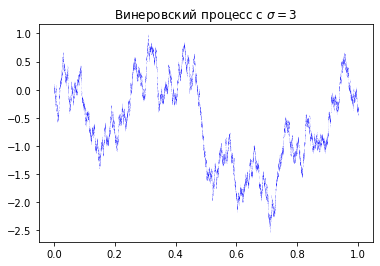

In [126]:
k = 16
sigma = 3
w = wiener(sigma, k)
x = np.linspace(0, 1, 2**k + 1)
plt.plot(x, w, 'b.', ms = 0.02)
plt.title(r'Винеровский процесс с $\sigma=3$')
plt.show()

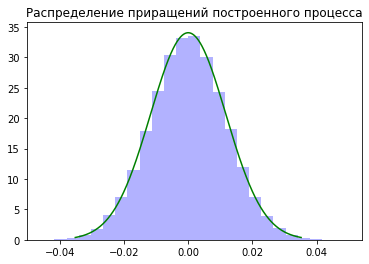

In [111]:
plt.hist(np.diff(w), bins=25, density=True, color='b', alpha=0.3)
h = 1 / 2**k
x = np.linspace(-3 * sigma * np.sqrt(h), 3 * sigma * np.sqrt(h), 2**k)
plt.plot(x, 1 / sigma / np.sqrt(h) * norm.pdf(x / sigma / np.sqrt(h)), c='g', lw=1.5)
plt.title('Распределение приращений построенного процесса')
plt.show()

In [112]:
 def ornstein_uhlenbeck(sigma, lam, k): # моделирует процесс Орнштейна-Уленбека на сетке размера 2^k + 1
    ou = np.zeros(2**k + 1)
    ou[0] = np.random.randn() * sigma
    ou[-1] = sigma * np.sqrt(1 - np.exp(-2 * lam)) * np.random.randn() + ou[0] * np.exp(-lam)
    step = 2**k
    first = 2**(k - 1)
    h = 1
    for i in range(0, k):
        h /= 2
        ou[first::step] = np.random.randn(2**i) * sigma * np.sqrt((np.exp(2 * h * lam) - 1) / (np.exp(2 * h * lam) + 1)) + (ou[:-1:step] + ou[step::step]) / (np.exp(lam * h) + np.exp(-lam * h))
        first = first // 2
        step = step // 2
    return ou

Text(0.5, 1.0, 'График процесса Орнштейна-Уленбека')

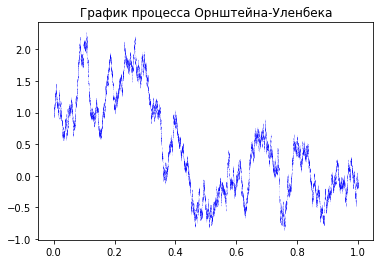

In [127]:
k = 17
sigma = 1
lam = 5
ou = ornstein_uhlenbeck(sigma, lam, k)
x = np.linspace(0, 1, 2**k + 1)
plt.plot(x, ou, 'b.', ms=0.02)
plt.title('График процесса Орнштейна-Уленбека')

# Задание 10

#### Произвести фильтрацию одномерного процесса Орнштейна-Уленбека:
#### 1. Используя генератор белого шума, добавить случайную ошибку с известной дисперсией к реализации процесса Орнштейна-Уленбека.
#### 2. При помощи одномерного фильтра Калмана оценить траекторию процесса по зашумленному сигналу. Параметры процесса и белого шума считать известными.
#### 3. Рассмотреть случай, когда шум
   - является гауссовским;
   - имеет распределение Коши.

Рассмотрим сетку $\{t_n = nh, n = 0, 1, \ldots, N\},\ h = \dfrac1N$ и значения процесса Орнштейна-Уленбека
$x_n = X(t_n).$

Представим процесс в виде дискретной динамической системы вида
$$x_{n+1} = ax_n + \nu_n, \quad \mathrm{i.i.d.}\ \nu_n \sim \mathcal{N}(0, q), \quad x_1 \sim \mathcal{N}(0, \sigma^2).$$
Обозначим зашумленный сигнал
$$y_n = x_n + \varepsilon_n, \quad \mathrm{i.i.d.}\ \varepsilon_n \sim \mathcal{N}(0, r).$$
Параметры $\sigma, \lambda$ процесса считаем известными. Найдем через них параметры системы $a, q$. Для этого запишем ковариационную функцию для процесса в моменты $t_n$ и $t_{n+1}$:
$$R(t_n, t_n) = \mathrm{var}(x_n) = \sigma^2,$$
$$R(t_n, t_{n+1}) = \mathrm{cov}(x_n, x_{n+1}) = a\ \mathrm{var}(x_n) = a\sigma^2 = \sigma^2 e^{-\lambda h},$$
$$R(t_{n+1}, t_{n+1}) = \mathrm{var}(x_{n+1}) = a^2\mathrm{var}(x_n) + q = a^2\sigma^2 + q = \sigma^2.$$
Отсюда легко выразить
$$a = e^{-\lambda h}, \quad q = \sigma^2(1 - e^{-2\lambda h}).$$

Опишем один шаг дискретного фильра Калмана. Обозначим за $\hat x_{n|n}$ оценку значения $x_n$ при известных $y_1, \ldots y_n$. $\hat x_{n|n-1}$ - экстраполяция процесса на следующий шаг в соответствии с динамической системой. Через $p_{n|n}$ будем обозначать дисперсию ошибки фильтрации на $n$-м шаге, через $p_{n|n-1}$ - прогнозируемую на следующем шаге дисперсию.

1. Прогнозируем значение процесса и дисперсию ошибки
$$ \hat x_{n|n-1} = a\hat x_{n-1|n-1}, \quad p_{n|n-1} = a^2 p_{n-1|n-1} + q.$$
2. Вычисляем разницу между наблюдаемым процессом и прогнозом и коэффициент усиления Калмана
$$ \delta_{n} = y_n - \hat x_{n|n-1}, \quad k_n = \dfrac{p_{n|n-1}}{p_{n|n-1} + r}.$$
3. В качестве результата фильтрации берем выпуклую комбинацию наблюдаемого и предсказанного значения
$$ \hat x_{n|n} = \hat x_{n|n-1} + k_n\delta_n, \quad p_{k|k} = (1 - k_n)p_{n|n-1}. $$

Поскольку рассматривается линейный фильтр гауссовского процесса с гауссовским шумом, ошибка фильтрации будет иметь нормальное распределение, а доверительный интервал с уровнем доверия $\alpha$ будет иметь вид
$$[\hat x_{n|n} - \Delta, \, \hat x_{n|n} + \Delta], \quad \Delta = -\sqrt{p_{n|n}}\Phi^{-1}\left(\dfrac{\alpha}2\right).$$

#### Нормальная ошибка

Text(0.5, 1.0, 'Чистый сигнал')

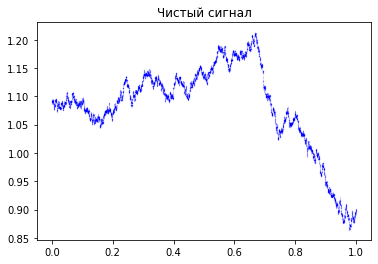

In [139]:
k = 15
n = int(2**k + 1)
sigma = 1
lam = 0.01
x = ornstein_uhlenbeck(sigma, lam, k)
ls = np.linspace(0, 1, n)
plt.plot(ls, x, 'b.', alpha=0.8, ms=0.05)
plt.title('Чистый сигнал')

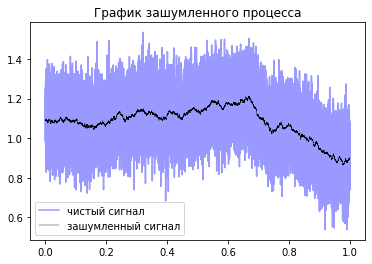

In [147]:
r = 0.01
noise = np.sqrt(r) * np.random.randn(n)
y = x + noise
plt.plot(ls, y, 'b', alpha=0.4, label='чистый сигнал')
plt.plot(ls, x, 'k', lw=0.4, label='зашумленный сигнал')
plt.legend()
plt.title('График зашумленного процесса')
plt.show()

In [148]:
def kalman(y, a, q, r):
    n = y.size
    p = np.zeros(n)
    x_est = np.zeros(n)
    x_est[0] = y[0]
    p[0] = r
    for i in range(1, n):
        x_pred = a * x_est[i - 1]
        p_pred = a**2 * p[i - 1] + q
        dif = y[i] - x_pred
        k = p_pred / (p_pred + r)
        x_est[i] = x_pred + k * dif
        p[i] = (1 - k) * p_pred
    return [x_est, p]

In [149]:
h = 1 / (n - 1)
a = np.exp(-lam * h)
q = sigma**2 * (1 - np.exp(-2 * lam * h))

[filtered, err] = kalman(y, a, q, r) 

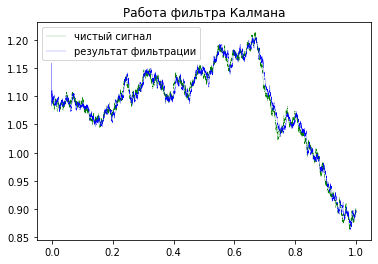

In [150]:
plt.plot(ls, x, 'g--', lw = 0.3, label='чистый сигнал')
plt.plot(ls, filtered, 'b', lw=0.2, label='результат фильтрации')
plt.legend()
plt.title('Работа фильтра Калмана')
plt.show()

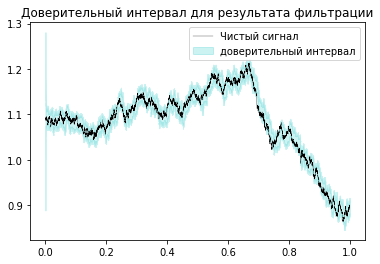

Out of the confidence interval: 6.286429247154322 %


In [152]:
alpha = 0.05
gamma = norm.ppf(alpha / 2)
one_side_error = -np.sqrt(err) * gamma

left = filtered - one_side_error
right = filtered + one_side_error
plt.fill_between(ls, left, right, alpha=0.2, color='c', label='доверительный интервал')
plt.plot(ls, x, 'k', lw=0.3, label='Чистый сигнал')
plt.legend()
plt.title('Доверительный интервал для результата фильтрации')
plt.show()
print('Out of the confidence interval:', ((x < left) + (x > right)).sum() / n * 100, '%')

#### Ошибка имеет распределение Коши

Text(0.5, 1.0, 'Сигнал без шума')

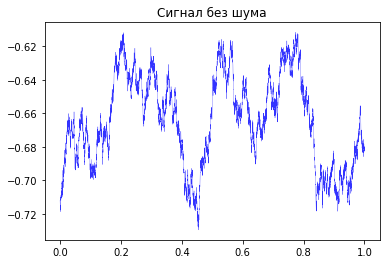

In [153]:
k = 14
n = int(2**k + 1)
sigma = 1
lam = 0.01
x = ornstein_uhlenbeck(sigma, lam, k)
ls = np.linspace(0, 1, n)
plt.plot(ls, x, color='b', alpha=0.8, lw=0.3)
plt.title('Сигнал без шума')

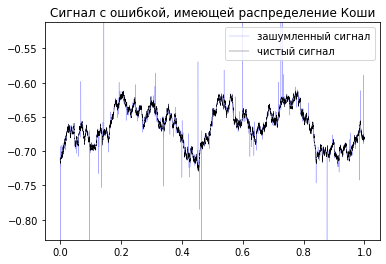

In [165]:
r = 0.0001
noise = np.random.standard_cauchy(n) * r
y = x + noise
plt.plot(ls, y, 'b', alpha=0.4, lw=0.4, label='зашумленный сигнал')
plt.plot(ls, x, 'k', lw=0.3, label='чистый сигнал')
plt.ylim(np.min(x) - 0.1, np.max(x) + 0.1)
plt.legend()
plt.title('Сигнал с ошибкой, имеющей распределение Коши')
plt.show()

In [166]:
h = 1 / (n - 1)
a = np.exp(-lam * h)
q = sigma**2 * (1 - np.exp(-2 * lam * h))

[filtered, err] = kalman(y, a, q, r) 

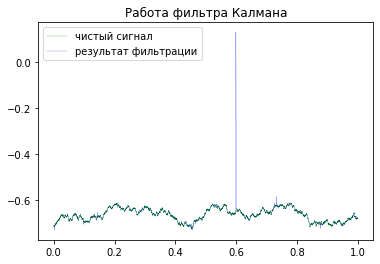

In [169]:
plt.plot(ls, x, 'g--', lw = 0.3, label='чистый сигнал')
plt.plot(ls, filtered, 'b', lw=0.2, label='результат фильтрации')
plt.legend()
plt.title('Работа фильтра Калмана')
plt.show()

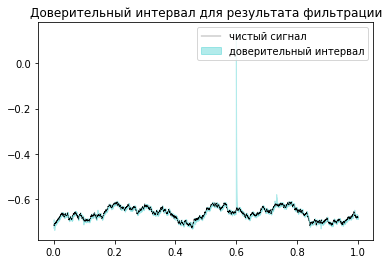

Out of the confidence interval: 1.3426914861153494 %


In [168]:
alpha = 0.05
gamma = norm.ppf(alpha / 2)
one_side_error = -np.sqrt(err) * gamma

left = filtered - one_side_error
right = filtered + one_side_error
plt.fill_between(ls, left, right, alpha=0.3, color='c', label='доверительный интервал')
plt.plot(ls, x, 'k', lw=0.3, label='чистый сигнал')
plt.legend()
plt.title('Доверительный интервал для результата фильтрации')
plt.show()
print('Out of the confidence interval:', ((x < left) + (x > right)).sum() / n * 100, '%')